In [5]:
from ultralytics import YOLO
# import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
# !yolo mode=checks

In [11]:
from roboflow import Roboflow
rf = Roboflow(api_key="AtgKbLMmJOglsXJRqoA6")
project = rf.workspace("proyecto-retina").project("retina-anomalies-detection")
dataset = project.version(4).download("yolov8")


print(dataset)


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.226, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Retina-anomalies-detection-4 in yolov8:: 100%|██████████| 1526/1526 [01:06<00:00, 22.79it/s]

In [12]:
print(dataset.location)

/root/Work/yolov8/yolov8_medical/Retina-anomalies-detection-4


In [24]:
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=50 imgsz=640
# !yolo task=segment mode=train model=yolov8x-seg.pt data=/root/Work/yolov8 copy/Salud_Ojos-1/data.yaml epochs=50 imgsz=640

New https://pypi.org/project/ultralytics/8.0.228 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.226 🚀 Python-3.11.5 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/root/Work/yolov8/yolov8_medical/Salud_Ojos-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save

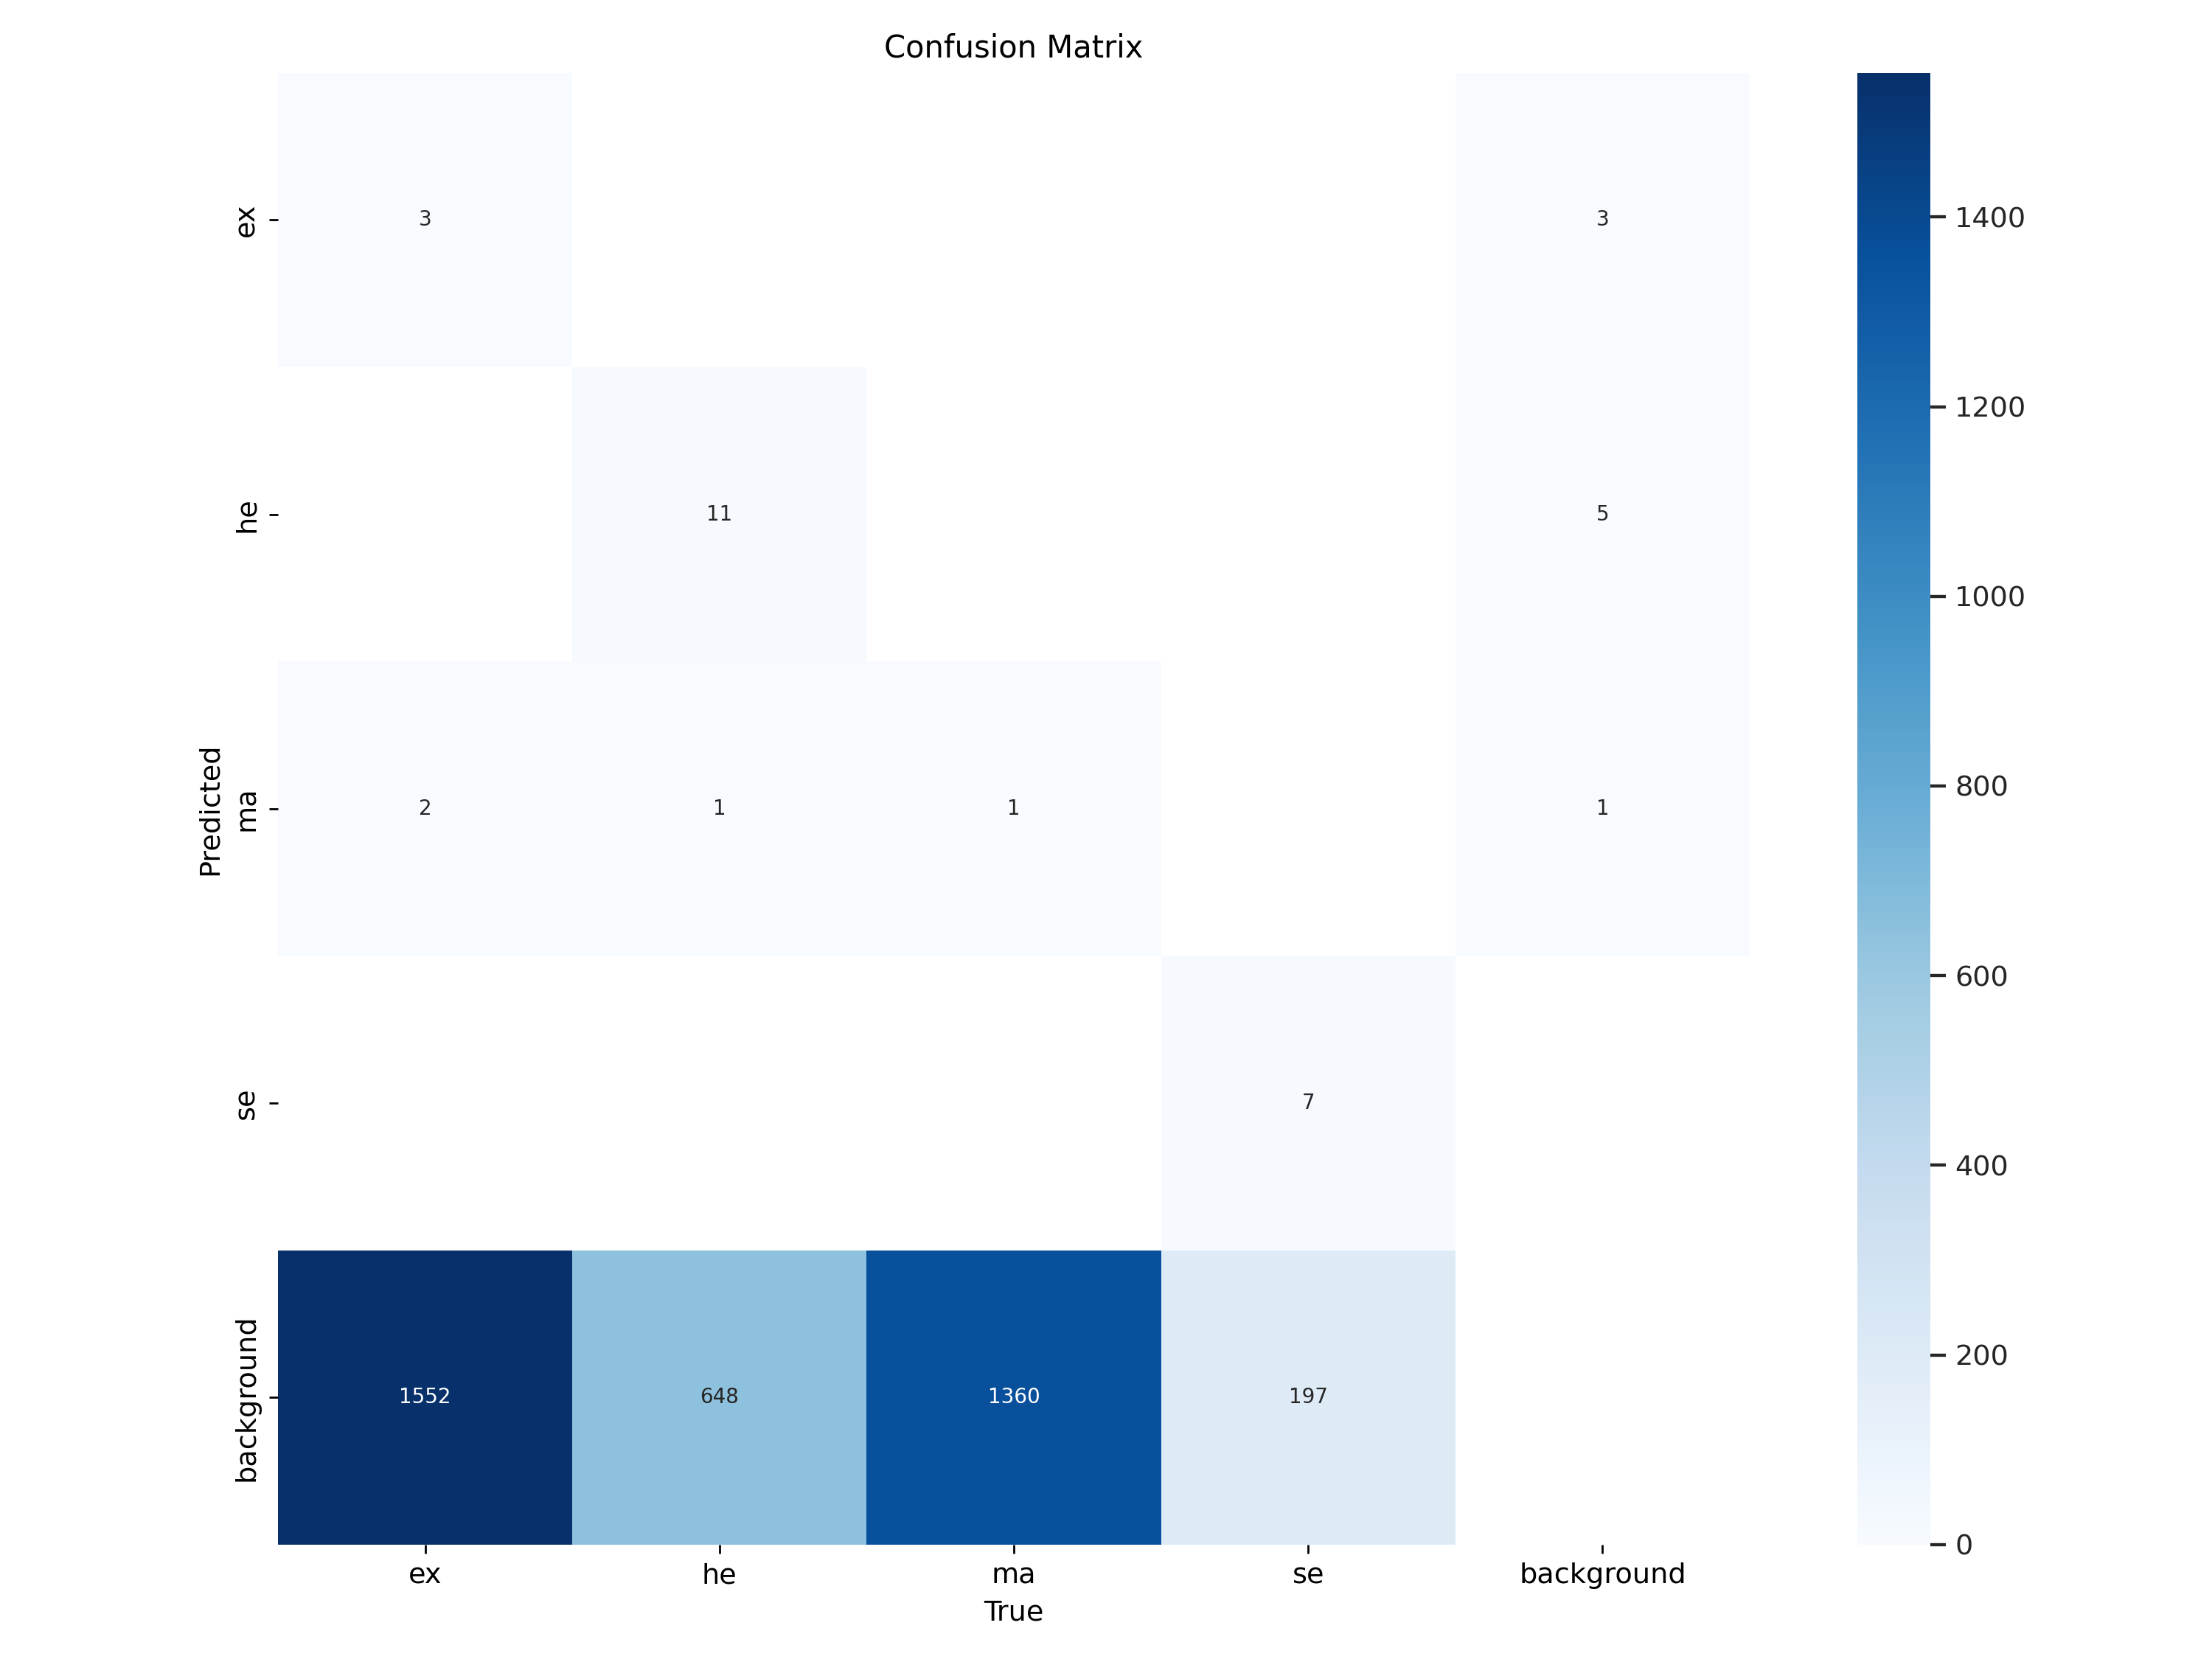

In [19]:
Image(filename=f'/root/.pyenv/runs/detect/train5/confusion_matrix.png', width=900)

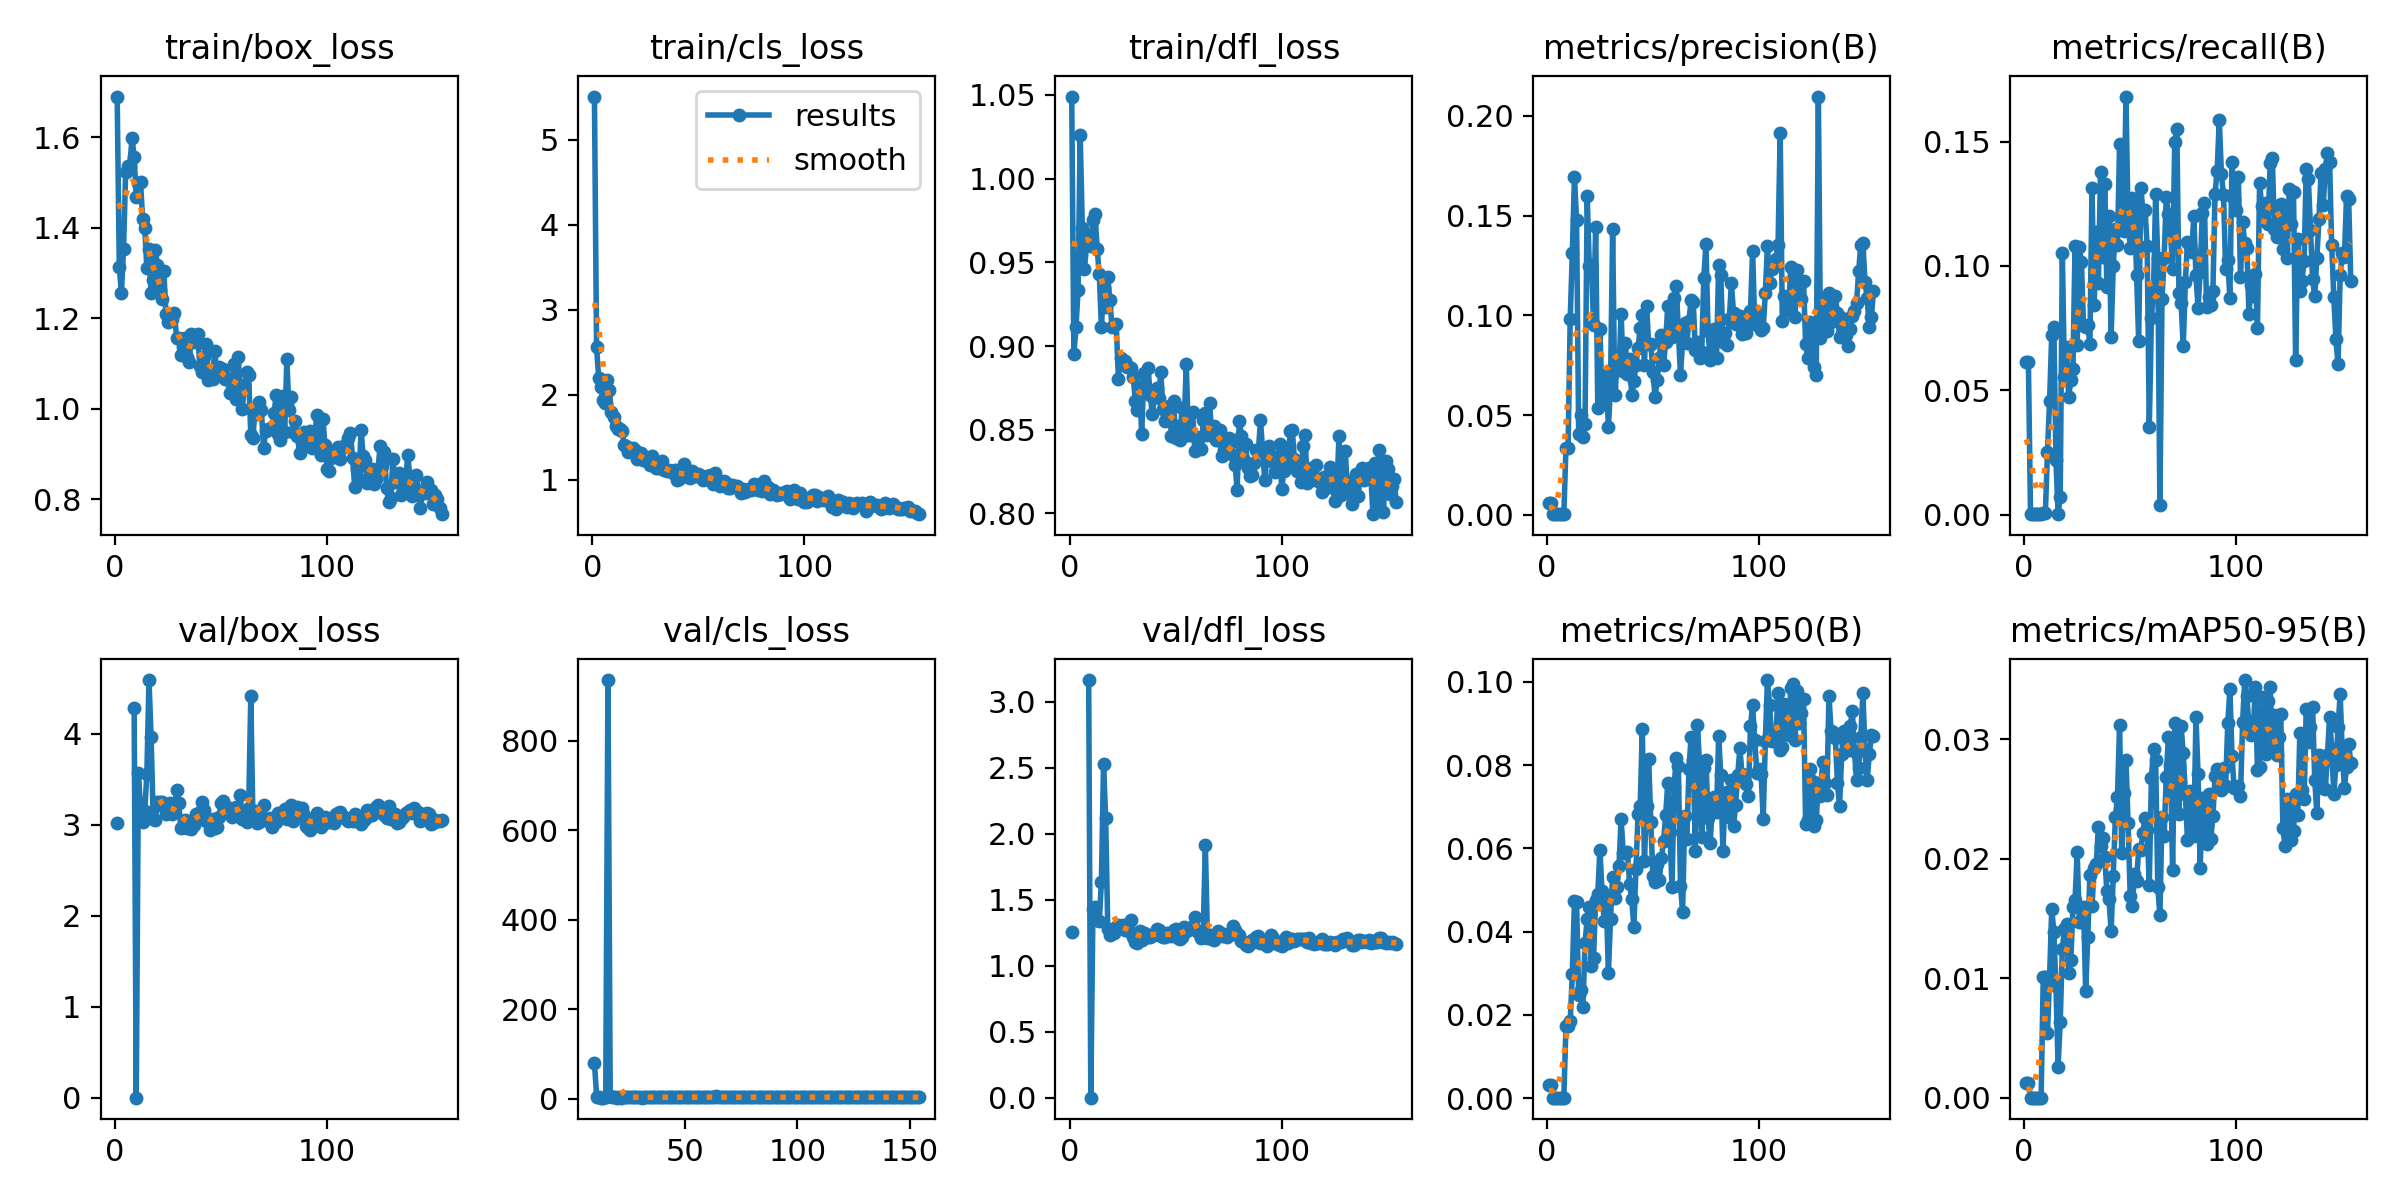

In [20]:
Image(filename=f'/root/.pyenv/runs/detect/train5/results.png', width=900)

In [15]:
print({dataset.location})

{'/root/Work/yolov8/Diabetic-Retinopathy-Detection-1'}


In [23]:
!yolo task=detect mode=predict model=/root/Work/yolov8/yolov8_medical/model/retina_detect_1221.pt conf=0.5 source=/root/Work/yolov8/yolov8_medical/DDR-Set-2/DDR-Set-2/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.0.226 🚀 Python-3.11.5 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients, 257.4 GFLOPs

image 1/23 /root/Work/yolov8/yolov8_medical/DDR-Set-2/DDR-Set-2/test/images/007-2505-100_jpg.rf.6a1b668eb0279fa9cb7b6d6f4b9eaa48.jpg: 640x640 (no detections), 34.1ms
image 2/23 /root/Work/yolov8/yolov8_medical/DDR-Set-2/DDR-Set-2/test/images/007-2836-100_jpg.rf.bc5e2c38cf575c02fcdb43f797817b48.jpg: 640x640 (no detections), 33.9ms
image 3/23 /root/Work/yolov8/yolov8_medical/DDR-Set-2/DDR-Set-2/test/images/007-2852-100_jpg.rf.8554265fb95c66f29595bb2ef70e4ce0.jpg: 640x640 (no detections), 33.0ms
image 4/23 /root/Work/yolov8/yolov8_medical/DDR-Set-2/DDR-Set-2/test/images/007-5267-300_jpg.rf.a6f37e0a9d96ac412dd85010095b7ed3.jpg: 640x640 (no detections), 26.9ms
image 5/23 /root/Work/yolov8/yolov8_medical/DDR-Set-2/DDR-Set-2/test/images/007-5285-300_jpg.rf.ecb8a247eafa568dc3a75fc2b5836ed3.jpg: 640x640 (no detec

In [8]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/root/.pyenv/runs/segment/predict/2.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

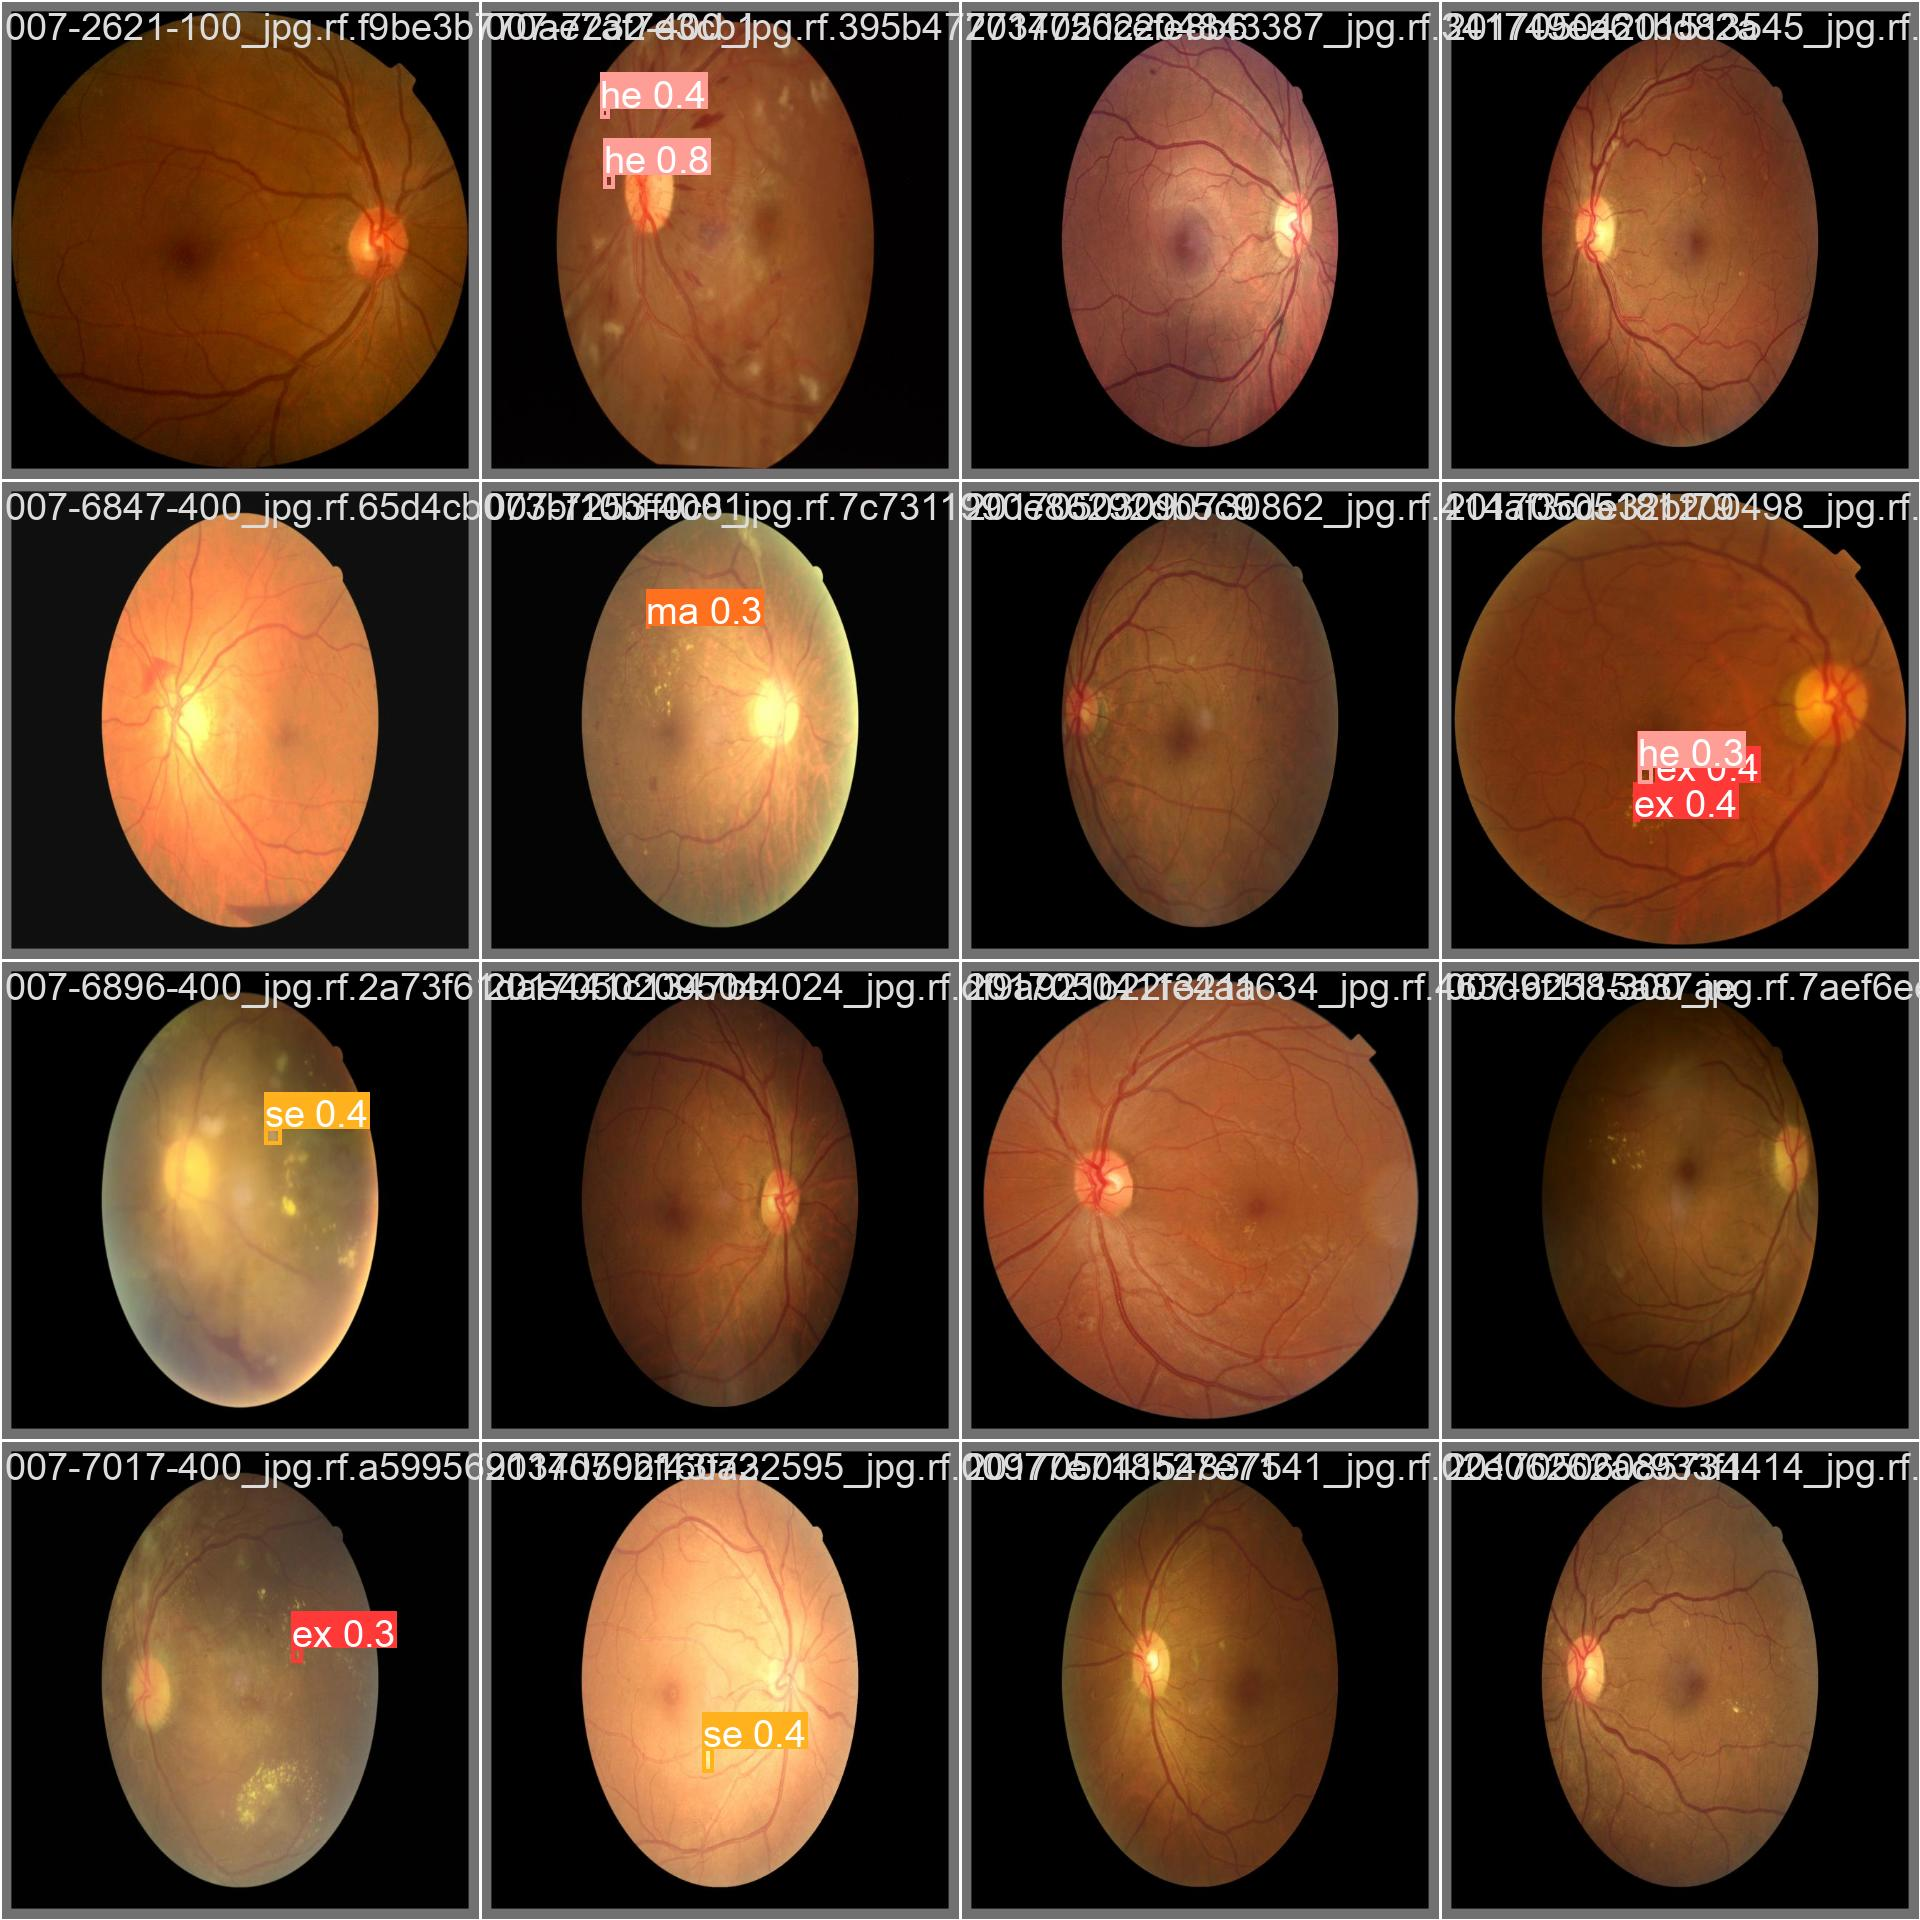

In [21]:
Image(filename=f'/root/.pyenv/runs/detect/train5/val_batch0_pred.jpg', height=600)

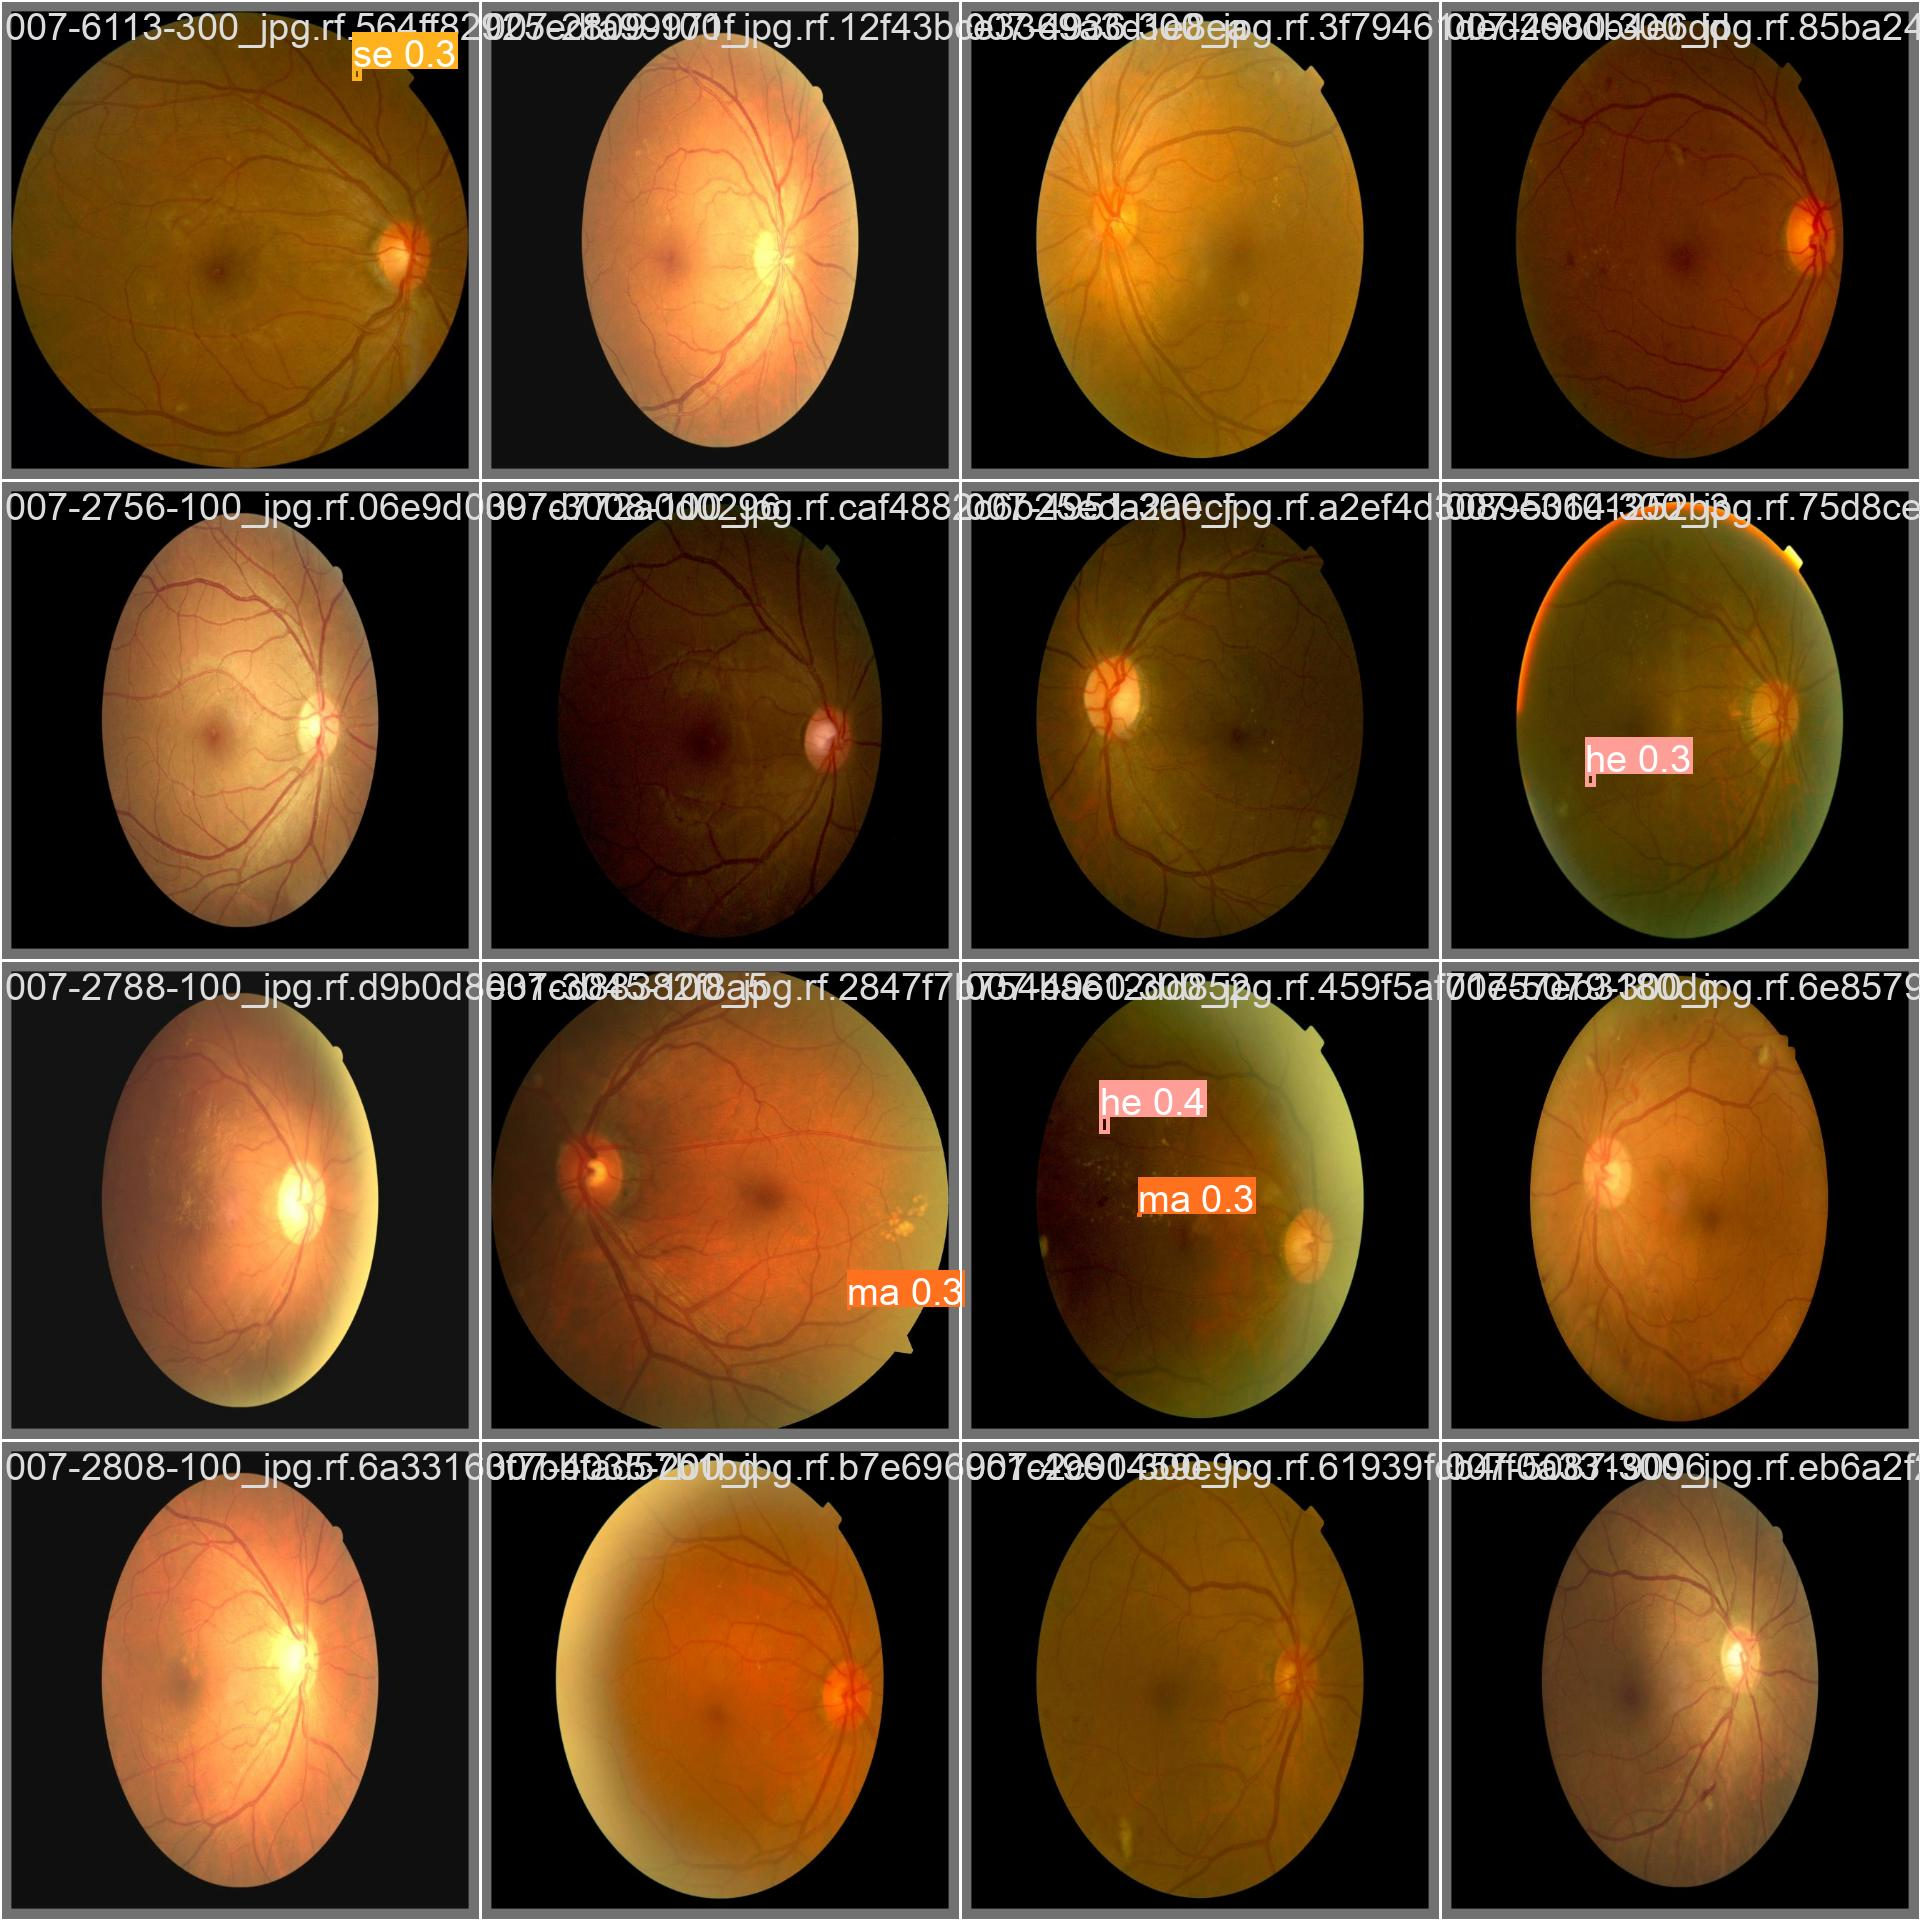

In [22]:
Image(filename=f'/root/.pyenv/runs/detect/train5/val_batch1_pred.jpg', height=600)

In [ ]:
from ultralytics import YOLO
# from ultralytics.yolo.v8.detect.predict import DetectionPredictor

model = YOLO("retina_seg.pt")
model.info()

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/root/Work/yolov8_copy/DDR-Set-2/DDR-Set-2/test/images/*jpg'):
      results = model.predict(source=image_path,project="/root/Work/yolov8_copy/result/segment/retina",save=True)
      print("\n")

In [5]:
from ultralytics import YOLO
model = YOLO("retina_seg.pt")
model.info()
results = model.predict(source="/root/Work/dataset/idrd/A. Segmentation/1. Original Images/a. Training Set/IDRiD_01.jpg",project="/root/Work/yolov8_copy/result/segment",name="retina",save=True)
print(results)

YOLOv8x-seg summary: 401 layers, 71754700 parameters, 0 gradients, 344.5 GFLOPs

image 1/1 /root/Work/dataset/idrd/A. Segmentation/1. Original Images/a. Training Set/IDRiD_01.jpg: 448x640 18 EXs, 4 HEs, 18.2ms
Speed: 6.7ms preprocess, 18.2ms inference, 24.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /root/Work/yolov8_copy/result/segment/retina2


[ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes', 'masks']
masks: ultralytics.yolo.engine.results.Masks object
names: {0: 'EX', 1: 'HE', 2: 'MA', 3: 'SE'}
orig_img: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
       